In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [ ]:
data = pd.read_csv("data/symptoms.csv")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      125 non-null    object
 1   OS      125 non-null    int64 
 2   OW      125 non-null    int64 
 3   BB      125 non-null    int64 
 4   NDN     125 non-null    int64 
 5   DT      125 non-null    int64 
 6   PC      125 non-null    int64 
 7   PK      125 non-null    int64 
 8   AL      125 non-null    int64 
 9   NG      125 non-null    int64 
 10  UF      125 non-null    int64 
 11  IW      125 non-null    int64 
 12  LK      125 non-null    int64 
 13  WS      125 non-null    int64 
 14  DS      125 non-null    int64 
 15  HAE     125 non-null    int64 
dtypes: int64(15), object(1)
memory usage: 15.8+ KB


In [4]:
column_names = """
ID pacjenta
Obrzęki skóry
Obrzęki narządów wewnętrznych
Bóle brzucha
Nudności i wymioty
Pieczenie
Pokrzywka lub świąd
Alergia
Nagły atak obrzęków
Uraz fizyczny
Infekcja wirusowa
Nieskuteczność leków alergicznych
Występowanie podobnych objawów w rodzinie
Duszności
"""

<Axes: title={'center': 'Liczba wystąpień poszczególnych objawów w próbie'}, xlabel='Objawy', ylabel='Liczba wystąpień'>

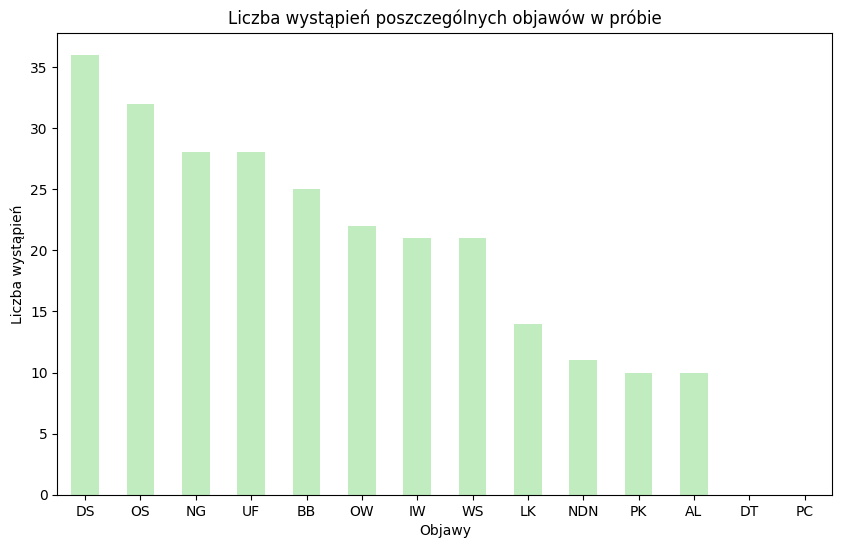

In [89]:
data[data.columns[1:-1]].sum().sort_values(ascending=False).plot(kind='bar', figsize=(10, 6), color='#C0ECC0', ylabel='Liczba wystąpień', xlabel='Objawy', title='Liczba wystąpień poszczególnych objawów w próbie', rot=0)

In [87]:
X_train, X_test, y_train, y_test = train_test_split(data[data.columns[1:-1].drop(["PC", "DT"])], data["HAE"], test_size=0.3, random_state=123, stratify=data["HAE"])

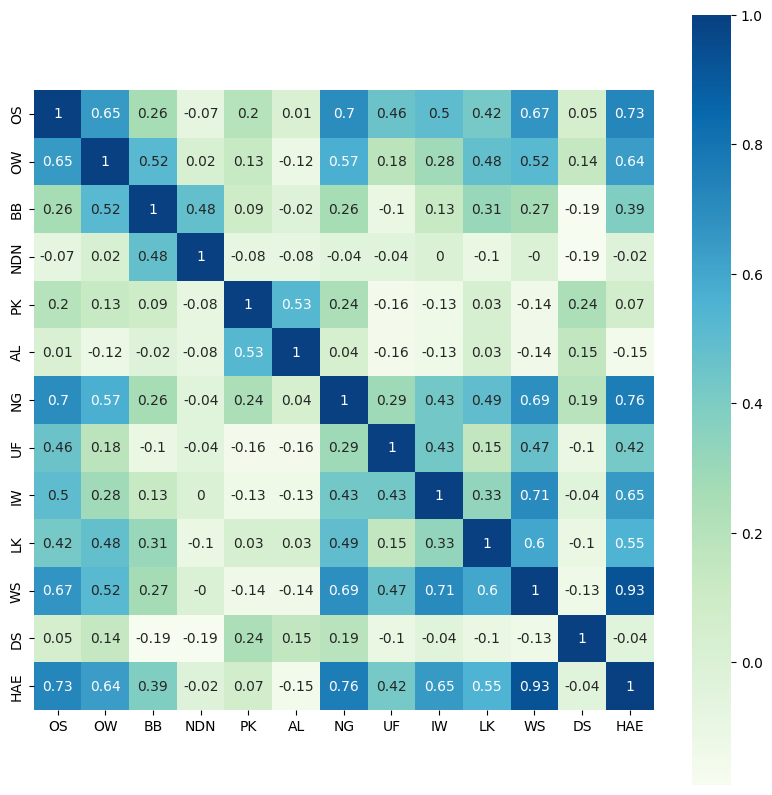

In [110]:
korelacjeHAE=round((pd.concat([X_train, y_train], axis=1)).corr(method='pearson'),2)
plt.figure(figsize=(10,10))
sns.heatmap(data = korelacjeHAE, annot = True, square = True, cmap = 'GnBu')
plt.show()

In [96]:
hyperparameters = {'max_depth' : range(1,6), 'min_samples_split' : [5, 10, 20, 50, 100]}
forest2 = GridSearchCV(RandomForestClassifier(random_state = 1234), hyperparameters, n_jobs = -1)
forest2.fit(X_train, y_train)
forest2.best_params_

{'max_depth': 2, 'min_samples_split': 5}

In [111]:
def waznosc_predyktorow(drzewo):
    # Skrót → pełna nazwa
    mapa_opisow = {
        "OS": "Obrzęki skóry",
        "OW": "Obrzęki narządów\nwewnętrznych",
        "BB": "Bóle brzucha",
        "NDN": "Nudności i wymioty",
        "PK": "Pokrzywka lub świąd",
        "AL": "Alergia",
        "NG": "Nagły atak obrzęków",
        "UF": "Uraz fizyczny",
        "IW": "Infekcja wirusowa",
        "LK": "Nieskuteczność\nleków alergicznych",
        "WS": "Występowanie podobnych\nobjawów w rodzinie",
        "DS": "Duszności"
    }

    # Oblicz ważności
    waznosci = pd.Series(drzewo.feature_importances_, index=X_train.columns)

    # Sortowanie
    waznosci.sort_values(inplace=True)

    # Wybierz top 10 i zamień indeksy na pełne opisy
    top10 = waznosci.iloc[-10:]
    top10.index = top10.index.map(lambda x: mapa_opisow.get(x, x))

    # Wykres
    top10.plot(kind='barh', figsize=(8, 6),color='#C0ECC0')
    plt.xlabel("Ważność cechy")
    plt.title("Najważniejsze predyktory")

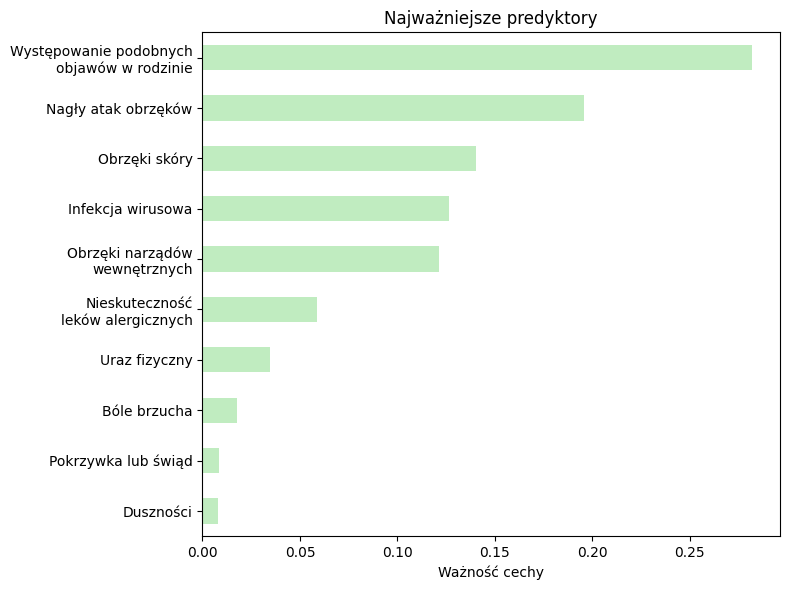

In [112]:
waznosc_predyktorow(forest2.best_estimator_)
plt.tight_layout()
plt.show()